# Overview  

In the previous notebook, we implemented **Ridge (L2)** and **Lasso (L1)** regularization techniques.  

This time, we're moving from regression to classification — by implementing our **first classification algorithm**,  
**Logistic Regression**, completely **from scratch**.  

This is the **third notebook** in the series — let’s get started!  

# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Loading and Analysis

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

Currently, our dataset contains **32 independent variables**.  
Having that many features doesn’t necessarily improve our model — instead, it can make training slower and potentially lead to overfitting.  

So, we’ll perform some **Exploratory Data Analysis (EDA)** to identify and extract the **most important features** that truly impact our target variable.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
fig = px.histogram(data_frame=df, x='diagnosis', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])
fig.show(renderer='iframe')

In [7]:
fig = px.histogram(data_frame=df, x='radius_mean', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])
fig.show(renderer='iframe')

In [8]:
fig = px.histogram(data_frame=df, x='area_mean', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])
fig.show(renderer='iframe')

In [9]:
fig = px.histogram(data_frame=df, x='perimeter_mean', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])
fig.show(renderer='iframe')

In [10]:
fig = px.histogram(data_frame=df, x='texture_mean', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])
fig.show(renderer='iframe')

In [11]:
fig = px.histogram(data_frame=df, x='smoothness_mean', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])
fig.show(renderer='iframe')

# Data Processing

In [12]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [13]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1(M)/0(B)

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we'll extract the **correlation values** of each feature with our target label, and select only those features that show a **correlation greater than 0.2**.  
This helps us focus on the most relevant variables and reduce unnecessary noise in our dataset.

In [15]:
corr = df.corr()

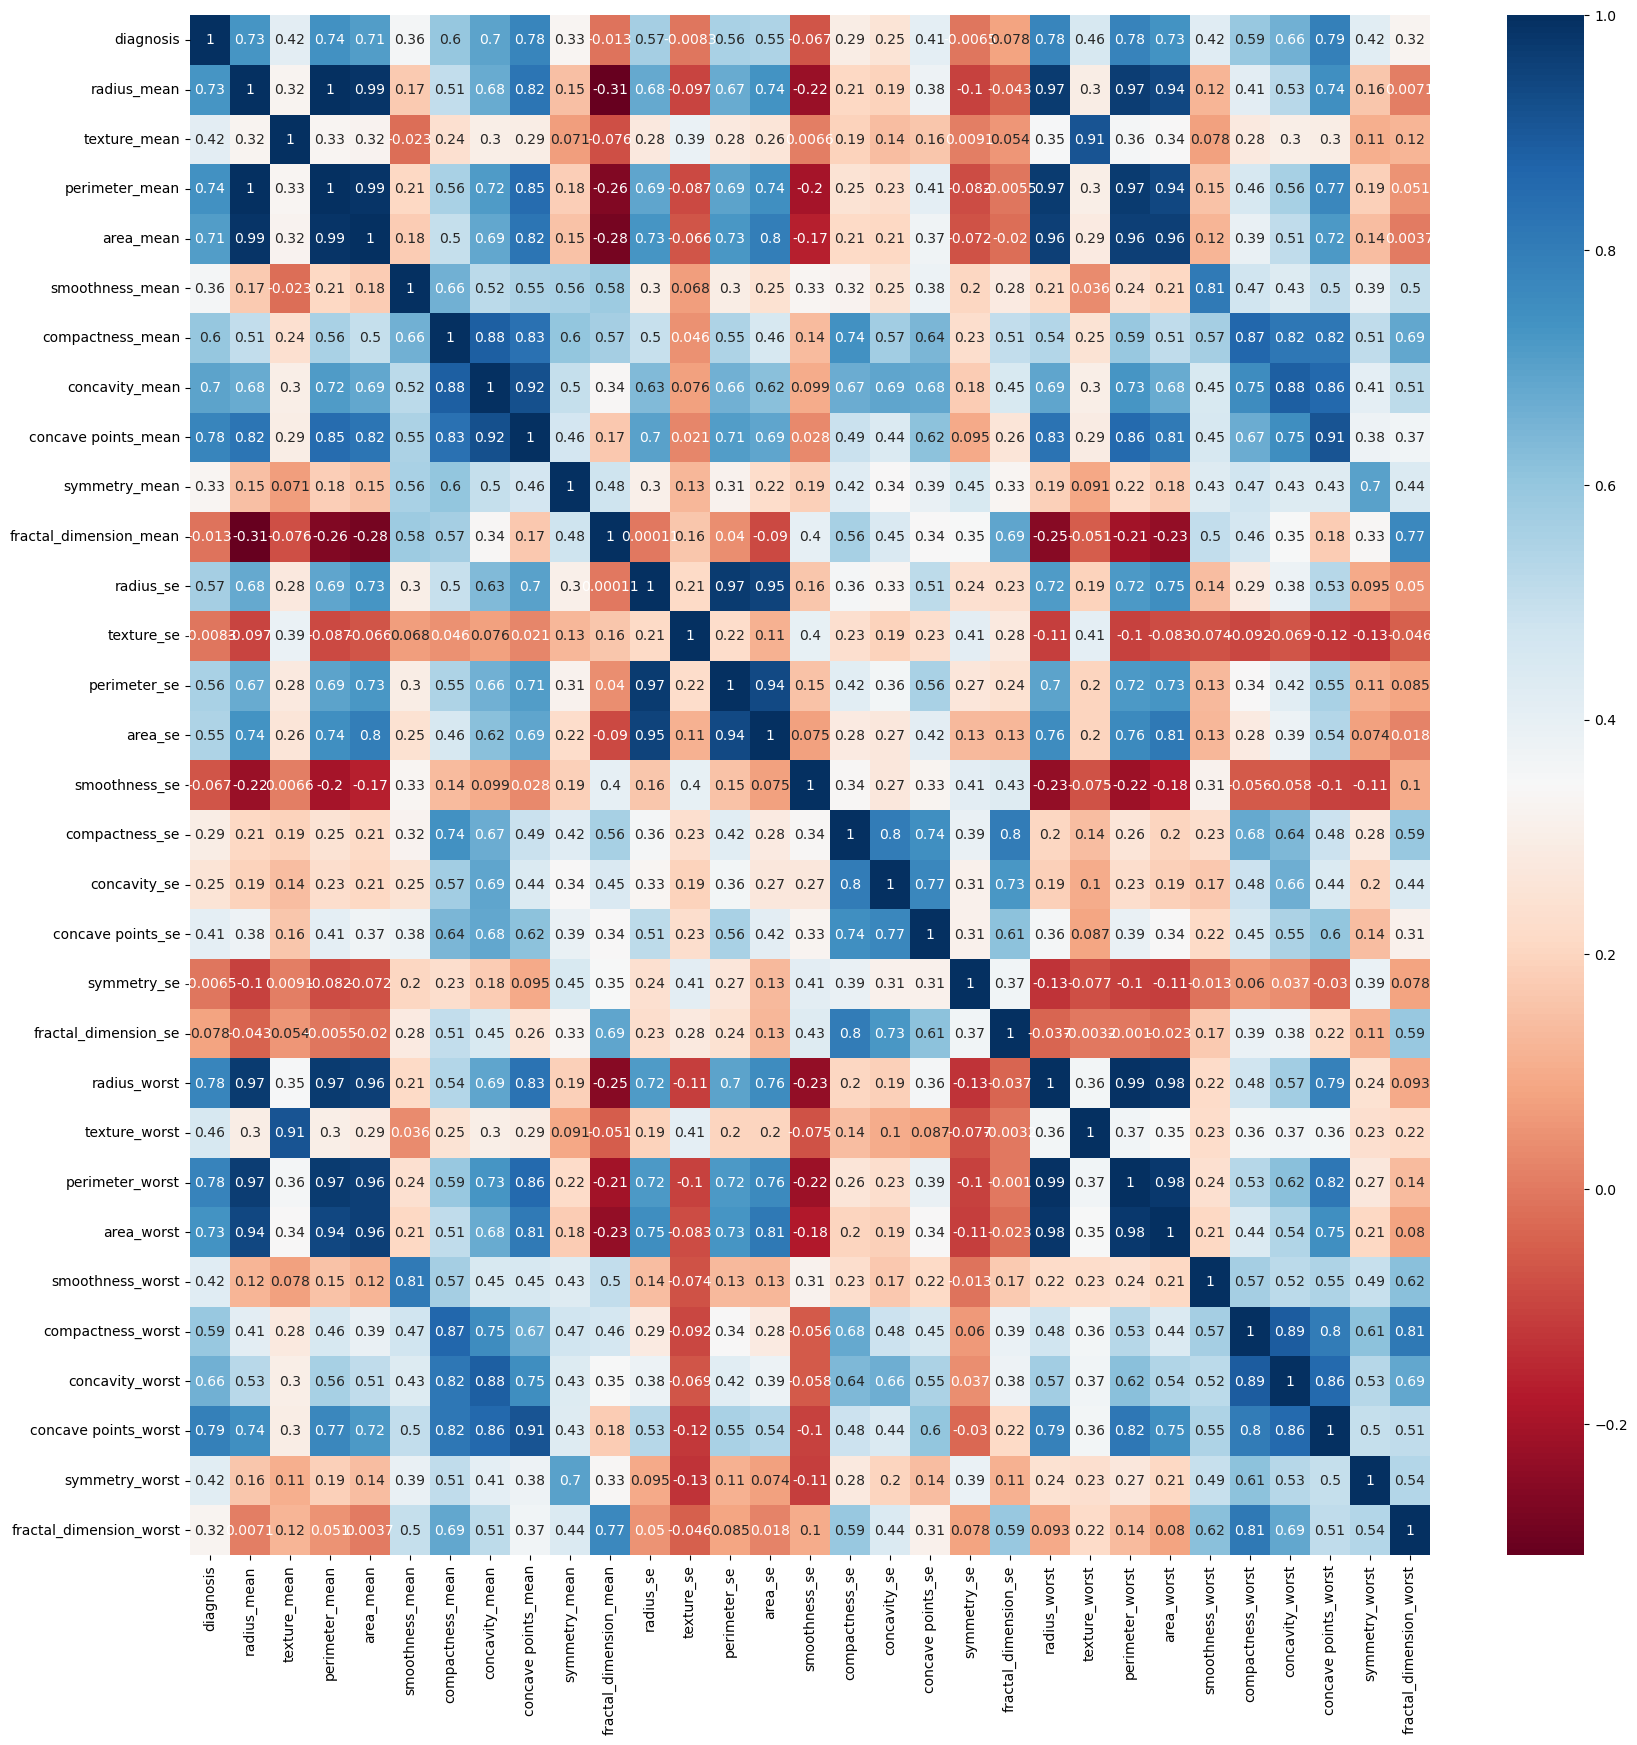

In [16]:
# The heatmap helps visualize the correlation values
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='RdBu',annot=True)
plt.show()

In [17]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')
len(names)

25

In [18]:
X = df[names].values
y = df['diagnosis'].values

Now we have to split our data into testing and training datasets.

In [19]:
def train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.
        random_state (int): Seed for the random number generator. Default is 42.
        

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """

    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Calculate the test count
    test_count = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_count]
    train_indices = shuffled_indices[test_count:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test
    

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((456, 25), (113, 25), (456,), (113,))

## Standardize the data

Standardization is a preprocessing technique used in machine learning to rescale and transform the features (variables) of a dataset to have a mean of 0 and a standard deviation of 1. It is also known as "z-score normalization" or "z-score scaling." Standardization is an essential step in the data preprocessing pipeline for various reasons:

### Why Use Standardization in Machine Learning?

1. **Mean Centering**: Standardization centers the data by subtracting the mean from each feature. This ensures that the transformed data has a mean of 0. Mean centering is crucial because it helps in capturing the relative variations in the data.

2. **Scale Invariance**: Standardization scales the data by dividing each feature by its standard deviation. This makes the data scale-invariant, meaning that the scale of the features no longer affects the performance of many machine learning algorithms. Without standardization, features with larger scales may dominate the learning process.

3. **Improved Convergence**: Many machine learning algorithms, such as gradient-based optimization algorithms (e.g., gradient descent), converge faster when the features are standardized. It reduces the potential for numerical instability and overflow/underflow issues during training.

4. **Comparability**: Standardizing the features makes it easier to compare and interpret the importance of each feature. This is especially important in models like linear regression, where the coefficients represent the feature's impact on the target variable.

5. **Regularization**: In regularization techniques like Ridge and Lasso regression, the regularization strength is applied uniformly to all features. Standardization ensures that the regularization term applies fairly to all features.

### How to Standardize Data

The standardization process involves the following steps:

1. Calculate the mean ($\mu$) and standard deviation ($\sigma$) for each feature in the dataset.
      $$
      \text{Mean ($\mu$)} = \frac{1}{n} \sum_{i=1}^{n} x_i
      $$
      $$
      \text{Standard Deviation($\sigma$)} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
      $$
2. For each data point (sample), subtract the mean ($\mu$) of the feature and then divide by the standard deviation ($\sigma$) of the feature.

Mathematically, the standardized value for a feature `x` in a dataset is calculated as:

$$
\text{Standardized value} = \frac{x - \mu}{\sigma}
$$

Here, `x` is the original value of the feature, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.


In [22]:
class Standardization:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit_transform(self, X_train):
        """
        Calculating the Mean and Standard Deviation using the training data.

        Parameter: X_train(np.ndarray)
        Returns: Standardized X_train
        """
        self.mean = np.mean(X_train, axis=0)
        self.std = np.std(X_train, axis=0)

        X_train = (X_train - self.mean) / (self.std)

        return X_train
    def transform(self, X_test):
        """
        Parameter: X_test(np.ndarray)
        Returns: Standardized X_test
        """
        X_test = (X_test - self.mean) / self.std

        return X_test

In [23]:
standardizer = Standardization()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

# Model Implementation

## How Does Logistic Regression Work?
Logistic Regression transforms the continuous output of a **Linear Regression** model into a **probability** that lies between 0 and 1.  
It does this using the **sigmoid (logistic) function**, which maps any real-valued input into the range *(0, 1)*.

The linear part of the model is computed as:

$$
z = {w} \cdot {X} + b
$$

### The Sigmoid Function
The **sigmoid function** maps any real-valued input $( z = {w} \cdot {X} + b)$ into a value between **0 and 1**, representing the **probability** that a sample belongs to **class 1**.  

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Its S-shaped curve tells us:  
- When \( z \) is **large and positive**, $( \sigma(z) \approx 1 )$ → high confidence in class 1  
- When \( z \) is **large and negative**, $( \sigma(z) \approx 0 )$ → high confidence in class 0  
- When \( z = 0 \), $( \sigma(z) = 0.5 )$ → the model is uncertain (decision boundary)  

In short, the sigmoid function **translates the model’s confidence (z)** into a **probability** between 0 and 1, allowing logistic regression to make **probabilistic predictions** instead of just binary decisions.  

#### Notation
- ${z}$ — Linear combination of inputs and parameters  
- ${w}$ — Model coefficients (weights)  
- ${b}$ — Bias term (intercept)  
- $\sigma(z)$ — Sigmoid (logistic) function that squashes *z* into a probability  
- $\hat{y}$ — Predicted probability that the output belongs to class 1

## Model Training
To train a logistic regression model, we aim to find the best values for the parameters $(w,b)$ that best fit our dataset and provide accurate class probabilities.

### Forward Pass

The **forward pass** computes the linear combination of input features **X** with the weight vector **w** and the bias term **b**,  
then applies the **sigmoid function** to map the result to a probability between 0 and 1:

$$
z = \mathbf{w} \cdot \mathbf{X} + b
$$

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Thus, the model’s predicted output is:

$$
\hat{y} = \sigma(z)
$$


### Cost Function

The cost function measures how well the model’s predicted probabilities match the true class labels.
In Logistic Regression, we use the Binary Cross-Entropy Loss (also known as the Log Loss or Negative Log-Likelihood Function).

It is defined as:

$$ J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}\bigg[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\bigg]$$

#### Notation  
- $J(w, b)$ — Cost function (average loss across all samples)  
- $m$ — Number of training examples  
- $y^{(i)}$ — Actual class label for the *i*-th sample (0 or 1)  
- $\hat{y}^{(i)}$ — Predicted probability for the *i*-th sample  
- $w$ — Model weights  
- $b$ — Bias (intercept)



### Backward Pass
To optimize the parameters $w$ and $b$, we use **Gradient Descent**, which updates the parameters in the opposite direction of the cost function’s gradient.  

The partial derivatives of the cost function with respect to $w$ and $b$ are given by:

$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m}(y^{(i)}- \hat{y}^{(i)}) X^{(i)}
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)}- \hat{y}^{(i)})
$$

## Training Process 
After computing the gradients, the parameters are updated using the **Gradient Descent** rule:

$$
w \leftarrow w - \alpha \frac{\partial J(w, b)}{\partial w}
$$

$$
b \leftarrow b - \alpha \frac{\partial J(w, b)}{\partial b}
$$

### Notation   
- $\alpha$ — Learning rate (controls step size during updates)  
- $X^{(i)}$ — Feature vector of the *i*-th training example  
- $y^{(i)}$ — True label of the *i*-th training example  
- $\hat{y}^{(i)}$ — Model prediction for the *i*-th example

 
By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the logistic regression model learns to make better predictions and fit the data.

In [24]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.
    
    Parameters:
        z (float or numpy.ndarray): The input value(s) for which to compute the sigmoid.

    Returns:
        float or numpy.ndarray: The sigmoid of the input value(s).

    Example:
        >>> sigmoid(0)
        0.5
    """

    return 1 / (1 + np.exp(-z))

In [25]:
z = np.linspace(-12, 12, 200)

In [26]:
fig = px.line(x = z, y = sigmoid(z), title = "Sigmoid Function", template = 'plotly_dark')
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9"), 
    yaxis=dict(color="#41BEE9") 
)
fig.show(renderer='iframe')

In [27]:
class LogisticRegression:
    """
    Logistic Regression model.

    Parameters:
        learning_rate (float): The step size used for updating model weights during gradient descent.  
        iterations (int): The number of times the algorithm will iterate over the entire training dataset.  
        plot_cost (bool): Whether to plot the cost function after training (True or False).  


    Methods:
        initialize_parameter(): Initializes the parameters of the model.
        sigmoid(z): Computes the sigmoid activation function for given input z.
        forward(X): Computes forward propagation for given input X.
        compute_cost(predictions): Computes the cost function for given predictions.
        backward_pass(predictions): Computes the gradients for the model using given predictions.
        fit(X, y, iterations, plot_cost): Trains the model on given input X and labels y for specified iterations.
        predict(X): Predicts the labels for given input X.
    """

    def __init__(self, learning_rate=0.0001, iterations=50000, convergence_tol=1e-6, plot_cost=False):
        assert learning_rate > 0, "Learning rate must be positive"
        assert iterations > 0, "Iterations must be greater than 0."
        assert convergence_tol > 0, "Convergence tolerance must be positive"
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.convergence_tol = convergence_tol
        self.plot_cost = plot_cost

    def initialize_parameter(self):
        """
        Initializes the weights of the model
        """
        self.W = np.ones(self.X.shape[1])
        self.b = 0

    def forward_pass(self, X):
        """
        Computes forward propagation for given input X.

        Parameters:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray: Output array.
        """
        z = np.dot(X, self.W) + self.b
        return sigmoid(z)

    def compute_cost(self, predictions):
        """
        Computes the cost function for given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.

        Returns:
            float: Cost of the model.
        """
        m = self.X.shape[0]  # number of training samples
        epsilon = 1e-8  # small value to prevent log(0)
        cost = np.sum(self.y * np.log(predictions + epsilon) +
                      (1 - self.y) * np.log(1 - predictions + epsilon))
        cost = -cost / m
        return cost

    def backward_pass(self, predictions):
        """
        Computes the gradients for the model using given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
        """
        m = self.X.shape[0]  # number of training samples

        # computing the gradients
        self.dW = np.dot(self.X.T, (predictions - self.y))
        self.db = np.sum(predictions - self.y)

        self.dW = self.dW / m
        self.db = self.db / m

    def fit(self, X, y):
        """
        Trains the model on given input X and labels y for specified iterations.

        Parameters:
            X (numpy.ndarray): Input features array of shape (n_samples, n )
            y (numpy.ndarray): Labels array of shape (n_samples, 1)

        Returns:
            None.
        """
        assert isinstance(X, np.ndarray), "X must be a NumPy array"
        assert isinstance(y, np.ndarray), "y must be a NumPy array"
        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"

        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(self.iterations):
            # forward pass
            predictions = self.forward_pass(self.X)

            # compute cost
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # backward pass
            self.backward_pass(predictions)

            # gradient descent
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db

            # print cost every 10000 iterations
            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tol:
                print(f'Converged after {i} iterations.')
                break

        if self.plot_cost:
            fig = px.line(y=costs, title="Cost vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="Cost")
            )
            fig.update_yaxes(dtick=0.1)
            fig.show(renderer='iframe')

    def predict(self, X):
        """
        Predicts the labels for given input X.

        Parameters:
            X (numpy.ndarray): Input features array.

        Returns:
            numpy.ndarray: Predicted labels.
        """
        predictions = self.forward_pass(X)
        return np.round(predictions)

In [28]:
lg = LogisticRegression(iterations=150000, plot_cost=True)
lg.fit(X_train, y_train)

Cost after iteration 0: 0.5242810385268446
Cost after iteration 10000: 0.4635232909753476
Cost after iteration 20000: 0.4063439533707058
Cost after iteration 30000: 0.3545819337387666
Cost after iteration 40000: 0.30874223916011945
Cost after iteration 50000: 0.26711038752800215
Cost after iteration 60000: 0.2318938509787556
Cost after iteration 70000: 0.20281290106299957
Cost after iteration 80000: 0.17826110871159123
Cost after iteration 90000: 0.1571168153592917
Cost after iteration 100000: 0.13909768826677998
Cost after iteration 110000: 0.12453716996732364
Converged after 117584 iterations.


# Evaluation

**In classification tasks, it's crucial to evaluate the performance of your model. There are several metrics that can help you understand how well your model is performing. Here are four commonly used classification metrics:**
## 1. Accuracy

**Formula:**
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

**Description:**
- **Accuracy** measures the proportion of correctly predicted instances out of all instances in a classification model.
- It is a widely used metric for evaluating classification performance.

**Interpretation:**
- A higher accuracy value indicates a better classification model.
- However, accuracy alone may not provide a complete picture, especially in imbalanced datasets.

## 2. Precision

**Formula:**
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

**Description:**
- **Precision** measures the proportion of true positive predictions out of all positive predictions made by the model.
- It is a useful metric when the cost of false positives is high.

**Interpretation:**
- Higher precision means the model makes fewer false positive predictions.

## 3. Recall (Sensitivity)

**Formula:**
$$
\text{Recall (Sensitivity)} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$

**Description:**
- **Recall**, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances in the dataset.
- It is a valuable metric when it's essential to capture all positive instances.

**Interpretation:**
- Higher recall means the model captures more of the actual positive instances.

## 4. F1-Score

**Formula:**
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
$$

**Description:**
- The **F1-Score** is the harmonic mean of precision and recall.
- It provides a balance between precision and recall, making it a suitable metric when there is a trade-off between false positives and false negatives.

**Interpretation:**
- A higher F1-Score indicates a model that achieves a balance between precision and recall.



In [29]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Computes the accuracy of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The accuracy of the model, expressed as a percentage.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        """
        Computes the precision of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The precision of the model, which measures the proportion of true positive predictions
        out of all positive predictions made by the model.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        """
        Computes the recall (sensitivity) of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The recall of the model, which measures the proportion of true positive predictions
        out of all actual positive instances in the dataset.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score(y_true, y_pred):
        """
        Computes the F1-score of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The F1-score of the model, which is the harmonic mean of precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

In [30]:
y_pred = lg.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

In [31]:
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

Accuracy: 97.35%
Precision: 95.35%
Recall: 97.62%
F1-Score: 96.47%
